In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [63]:
data= pd.read_csv('medical_charges_cat')
data.head()

,sex,smoker,region,charges
0,female,yes,southwest,16884.92400
1,male,no,southeast,1725.55230
2,male,no,southeast,4449.46200
3,male,no,northwest,21984.47061
4,male,no,northwest,3866.85520


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sex      1338 non-null   object 
 1   smoker   1338 non-null   object 
 2   region   1338 non-null   object 
 3   charges  1338 non-null   float64
dtypes: float64(1), object(3)
memory usage: 41.9+ KB


In [65]:
data.describe(include=object)

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [66]:
#missing values
data.isnull().sum()

sex        0
smoker     0
region     0
charges    0
dtype: int64

In [67]:
#outlier analysis
data['charges'].skew()

1.5158796580240388

In [68]:
y=data['charges']
X=data.drop('charges', axis=1)

In [69]:
for col in X:
    print(X[col].value_counts())

sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


<Axes: xlabel='sex', ylabel='charges'>

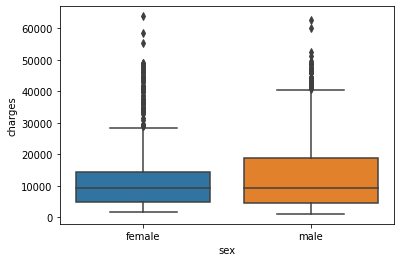

In [70]:
sns.boxplot(x=X['sex'], y=data['charges'])

<Axes: xlabel='smoker', ylabel='charges'>

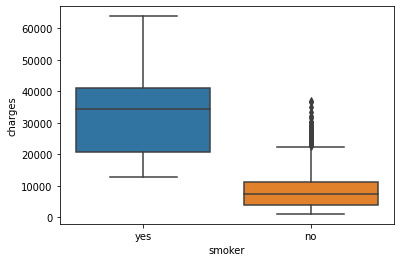

In [71]:
sns.boxplot(x=X['smoker'], y=data['charges'])

<Axes: xlabel='region', ylabel='charges'>

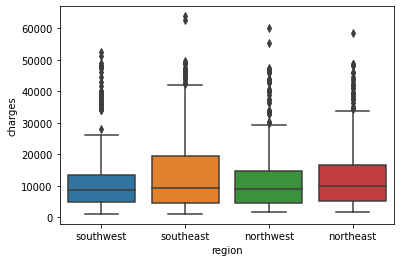

In [72]:
sns.boxplot(x=X['region'], y=data['charges'])

In [73]:
# Encoding
X= pd.get_dummies(X,dtype=float,drop_first=True)
X.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0


In [74]:
#SLR
import statsmodels
import statsmodels.api as sm 


xc=sm.add_constant(X)

In [75]:
xc.head()

,const,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,1.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.0,0.0,1.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0
4,1.0,1.0,0.0,1.0,0.0,0.0


In [76]:
mlr1=sm.OLS(y,xc).fit()
print(mlr1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     435.2
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          4.93e-277
Time:                        10:51:34   Log-Likelihood:                -13830.
No. Observations:                1338   AIC:                         2.767e+04
Df Residuals:                    1332   BIC:                         2.770e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             8568.0606    472.095  

In [77]:
X1=X['smoker_yes']
xc=sm.add_constant(X1)

In [78]:
slr1=sm.OLS(y,xc).fit()
print(slr1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     2178.
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          8.27e-283
Time:                        10:51:34   Log-Likelihood:                -13831.
No. Observations:                1338   AIC:                         2.767e+04
Df Residuals:                    1336   BIC:                         2.768e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8434.2683    229.014     36.829      0.0

In [ ]:
# Out of all the categorical attributes, smoker is a significant attribute.
# we can see there is difference in mean for both the categories with respect to the target
# which is the medical charges. 

# While buiding the model also we can notice all other variables are having pvalues greater than .05.
# Over all rsquare is also same if we notice in the previous 2 models. 

In [ ]:
# Assumptions

# Linearity

Linearity actually means that the effect of each predictor on the outcome should not be non-linear, as a straight line does not provide a good approximation of the relationship in that case. For a dummy variable with two categories, this assumption is trivially met, since the line of best fit connects the conditional means of the two categories, and a line between two points cannot be anything but linear. With multicategorical variables, it is the same thing, because you will be including them in the model as a series of dummy/cotnrast coded variables, again, modeled as a straight line between pairs of conditional means.

# normality in residuals
 Normality: You do not need to test these variables. Categorical variables by definition cannot have outliers. If you have observations outside the range of your data (for example, if you expected "male" or "female" as responses, and someone answered "bla", designate those responses as user-missing values and exclude them from the analysis. One way categorical variables can contribute to being an outlier, however, is when you look at multivariate outliers via something like Mahalanobis distances. For example, a person who is 70 years old is not an outlier (there are many even older people) and someone who is pregnant is not an outlier either, but a pregnant 70 year old constitutes a multivariate outlier.

# multicolinearity

Multicollinearity: This one is tricky. With a dichotomous categorical variable, there is no real issue. With multiple dummy variables coding the same multicategorical construct, there tends to be some degree of multicollinearity between the dummies, especially if the reference category has much fewer participants than the others. You can get around this either by designating a more populous reference category or accepting that it is normal, and you cannot do much.

# heteroscadasticity

To check homoscedasticity (equality of variance) for categorical predictors, we can check the variance within each group. We can use a rule of thumb that the variance of one group should not be four times that of another group.

# Auto corelation

No need to check this. There are various measures available for time series data, which is not required here.
